[@LorenaABarba](https://twitter.com/LorenaABarba)

In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

***12 étapes vers Navier–Stokes***
=====
***

Jusqu'à présent, tout notre travail s'est déroulé dans une dimension spatiale (Étapes [1](./01_FR_Step_1.ipynb) à [4](./05_FR_Step_4.ipynb)). Nous pouvons apprendre beaucoup en seulement 1D, mais grandissons en terrain plat : deux dimensions.

Dans les exercices suivants, vous allez étendre les quatre premières étapes pour passer en 2D. Pour étendre les formules de différences finies 1D aux dérivées partielles en 2D ou 3D, appliquez simplement la définition : une dérivée partielle par rapport à $x$ est la variation dans la direction $x$ *à constante* $y$.

Dans l'espace 2D, une grille rectangulaire (uniforme) est définie par les points de coordonnées :

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Maintenant, définissez $u_{i,j} = u(x_i,y_j)$ et appliquez les formules aux différences finies sur l'une ou l'autre des variables $x,y$ *agissant séparément* sur les indices $i$ et $j$. Toutes les dérivées sont basées sur le développement 2D de Taylor d'une valeur de point de maillage autour de $u_{i,j}$.

Ainsi, pour une dérivée partielle du premier ordre dans la direction $x$, une formule aux différences finies est :

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\ mathcal{O}(\Delta x)$$

et de même dans la direction $y$. Ainsi, nous pouvons écrire des formules de différence arrière, de différence avant ou de différence centrale pour les étapes 5 à 12. Commençons !

Étape 5 : Convection linéaire 2D
----
***

La PDE régissant la convection linéaire en 2D s'écrit

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

C'est exactement la même forme qu'avec la convection linéaire 1-D, sauf que nous avons maintenant deux dimensions spatiales à prendre en compte lorsque nous avançons dans le temps.

Encore une fois, le pas de temps sera discrétisé comme une différence vers l'avant et les deux pas spatiaux seront discrétisés comme des différences vers l'arrière.

Avec les implémentations 1-D, nous avons utilisé des indices $i$ pour indiquer le mouvement dans l'espace (par exemple, $u_{i}^n-u_{i-1}^n$). Maintenant que nous avons deux dimensions à prendre en compte, nous devons ajouter un deuxième indice, $j$, pour tenir compte de toutes les informations du régime.

Ici, nous utiliserons à nouveau $i$ comme index pour nos valeurs $x$, et nous ajouterons l'indice $j$ pour suivre nos valeurs $y$.

Dans cet esprit, notre discrétisation de la PDE devrait être relativement simple.

$$ \frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i- 1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0 $$

Comme précédemment, résolvez pour la seule inconnue :

$$ u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1 ,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n) $$

Nous allons résoudre cette équation avec les conditions initiales suivantes :


$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$
et les conditions aux limites :

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

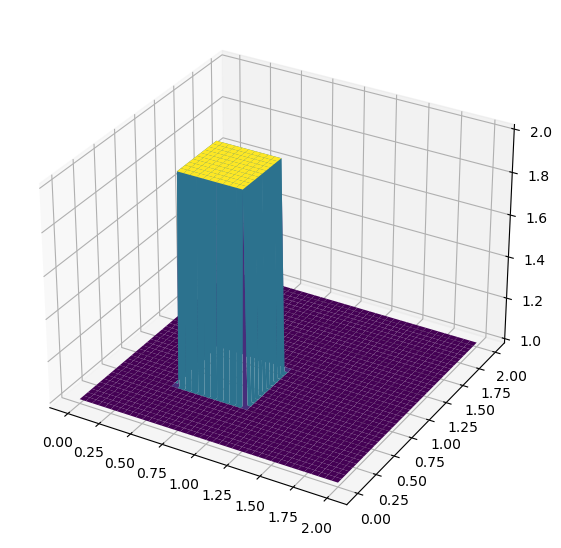

In [15]:
##Nouvelle bibliothèque requise pour les tracés 3D
from mpl_toolkits.mplot3d import Axes3D    
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

###déclaration des variables
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##crée un vecteur 1xn rempli de 1s
un = numpy.ones((ny, nx)) ##

### imposition des conditions initiales (C.I.)

## C.I. fonction chapeau : u(.5<=x<=1 && .5<=y<=1 ) est égal à  2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

### Initialisation du tracé
##le paramètre figsize peut être utilisé pour produire des images de différentes tailles

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)



### Remarque sur les graphes 3D 

Pour tracer un résultat en 3D, assurez-vous d'avoir ajouté la bibliothèque Axes3D.

    from mpl_toolkits.mplot3d import Axes3D

Les commandes de traçage sont un peu plus compliquées qu'avec de simples tracés 2D.

```python
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d') 
surf2 = ax.plot_surface(X, Y, u[:])
```

La première ligne ici initialise une fenêtre de figure. Les commandes **figsize** et **dpi** sont facultatives et spécifient simplement la taille et la résolution de la figure en cours de production. Vous pouvez les omettre, mais vous aurez toujours besoin du
    
    fig = pyplot.figure()

La ligne suivante attribue à la fenêtre de tracé l'étiquette d'axes 'ax' et spécifie également qu'il s'agira d'un tracé de projection 3D. La dernière ligne utilise la commande
    
    plot_surface()

qui équivaut à la commande de tracé habituelle, mais elle prend une grille de valeurs X et Y pour les positions des points de données.

##### Remarque


Les valeurs `X` et `Y` que vous transmettez à `plot_surface` ne sont pas les vecteurs 1-D `x` et `y`. Pour utiliser les fonctions de traçage 3D de matplotlibs, vous devez générer une grille de valeurs `x, y` qui correspondent à chaque coordonnée dans le cadre de traçage. Cette grille de coordonnées est générée à l'aide de la fonction numpy `meshgrid`.

    X, Y = numpy.meshgrid(x, y)

 

### Itérer en deux dimensions

Évaluer l'onde en deux dimensions nécessite l'utilisation de plusieurs boucles for imbriquées pour couvrir tous les `i` et `j`. Étant donné que Python n'est pas un langage compilé, il peut y avoir des ralentissements notables dans l'exécution du code avec plusieurs boucles for. Essayez d'abord d'évaluer le code de convection 2D et voyez les résultats qu'il produit.

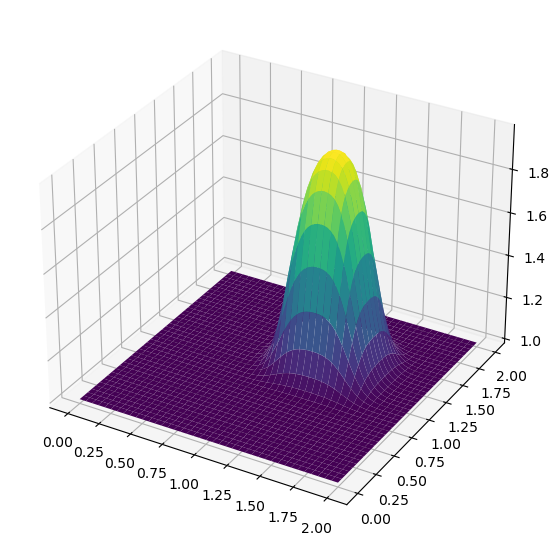

In [16]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ## boucle parcourant tous les instants à calculer
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d') #fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

Opérations sur les tableaux
----------------

Ici, le même code de convection 2D est implémenté, mais au lieu d'utiliser des boucles for imbriquées, les mêmes calculs sont évalués à l'aide d'opérations de tableau.

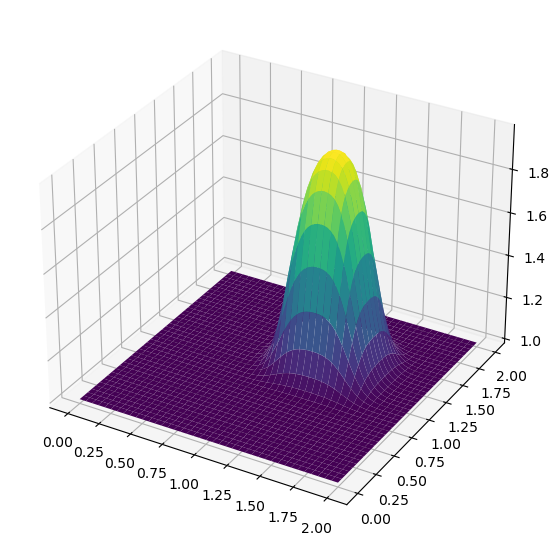

In [17]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ## boucle parcourant tous les instants à calculer
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d') #fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

    

## Pour aller plus loin ...

La leçon vidéo qui vous guide à travers les détails de l'étape 5 (et ensuite jusqu'à l'étape 8) est **Leçon 6** sur You Tube :

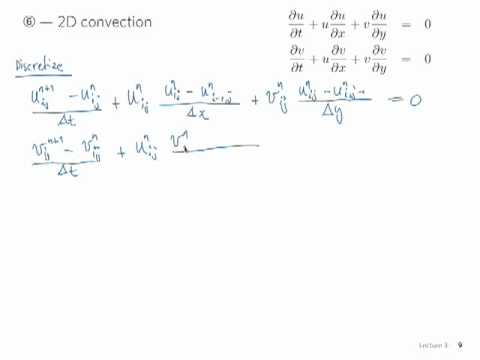

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [19]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (La cellule ci-dessus exécute le style de ce bloc-notes.)